In [ ]:
# Importing Libraries & Data Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel("/content/drive/MyDrive/Python/Prediction Data.xlsx")

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [ ]:
data.isnull().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,3548
Phone_Service,0
Multiple_Lines,622


In [ ]:
data['Customer_Status']

,Customer_Status
0,Stayed
1,Stayed
2,Churned
3,Churned
4,Churned
...,...
6413,Churned
6414,Stayed
6415,Churned
6416,Stayed


In [ ]:
data['Value_Deal']

,Value_Deal
0,NaN
1,NaN
2,Deal 5
3,Deal 4
4,NaN
...,...
6413,NaN
6414,Deal 1
6415,NaN
6416,NaN


In [ ]:
(data['Value_Deal'].mode())[0]

'Deal 2'

In [ ]:
data['Value_Deal']= data['Value_Deal'].replace(np.nan,data['Value_Deal'].mode()[0])
data['Multiple_Lines']= data['Multiple_Lines'].replace(np.nan,data['Multiple_Lines'].mode()[0])
data['Online_Security']= data['Online_Security'].replace(np.nan,data['Online_Security'].mode()[0])
data['Online_Backup']= data['Online_Backup'].replace(np.nan,data['Online_Backup'].mode()[0])
data['Device_Protection_Plan']= data['Device_Protection_Plan'].replace(np.nan,data['Device_Protection_Plan'].mode()[0])
data['Premium_Support']= data['Premium_Support'].replace(np.nan,data['Premium_Support'].mode()[0])
data['Streaming_TV']= data['Streaming_TV'].replace(np.nan,data['Streaming_TV'].mode()[0])
data['Streaming_Movies']= data['Streaming_Movies'].replace(np.nan,data['Streaming_Movies'].mode()[0])
data['Streaming_Music']= data['Streaming_Music'].replace(np.nan,data['Streaming_Music'].mode()[0])
data['Unlimited_Data']= data['Unlimited_Data'].replace(np.nan,data['Unlimited_Data'].mode()[0])
data['Customer_Status']= data['Customer_Status'].replace(np.nan,data['Customer_Status'].mode()[0])

In [ ]:
# Data Preprocessing
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [ ]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
y_train.mean()

np.float64(0.293640897755611)

In [ ]:
y_train.replace(np.nan,y_train.mode()[0],inplace=True)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test.replace(np.nan,y_test.mode()[0],inplace=True)

In [ ]:
# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[898  67]
 [147 172]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       965
         1.0       0.72      0.54      0.62       319

    accuracy                           0.83      1284
   macro avg       0.79      0.73      0.76      1284
weighted avg       0.82      0.83      0.82      1284



In [ ]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

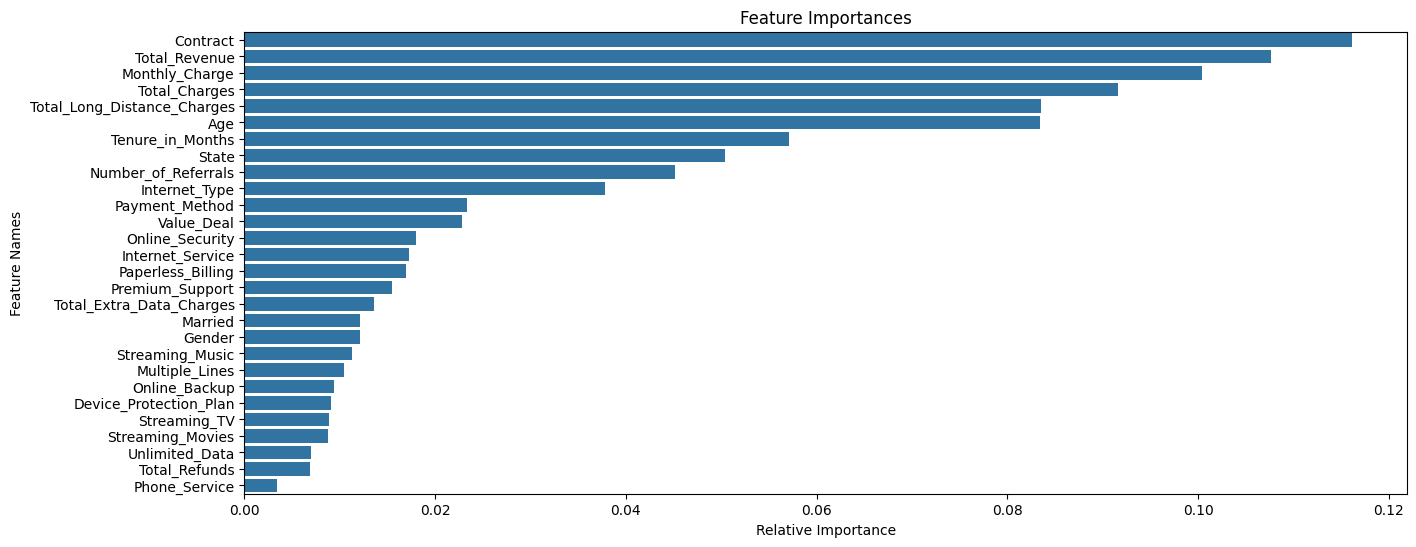

In [ ]:

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [ ]:
# Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
new_data = pd.read_excel("/content/drive/MyDrive/Python/Test Data.xlsx")

# Display the first few rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [ ]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']


In [ ]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [ ]:
new_data['Value_Deal']= new_data['Value_Deal'].replace(np.nan,new_data['Value_Deal'].mode()[0])
new_data['Multiple_Lines']= new_data['Multiple_Lines'].replace(np.nan,new_data['Multiple_Lines'].mode()[0])
new_data['Online_Security']= new_data['Online_Security'].replace(np.nan,new_data['Online_Security'].mode()[0])
new_data['Online_Backup']= new_data['Online_Backup'].replace(np.nan,new_data['Online_Backup'].mode()[0])
new_data['Device_Protection_Plan']= new_data['Device_Protection_Plan'].replace(np.nan,new_data['Device_Protection_Plan'].mode()[0])
new_data['Premium_Support']= new_data['Premium_Support'].replace(np.nan,new_data['Premium_Support'].mode()[0])
new_data['Streaming_TV']= new_data['Streaming_TV'].replace(np.nan,new_data['Streaming_TV'].mode()[0])
new_data['Streaming_Movies']= new_data['Streaming_Movies'].replace(np.nan,new_data['Streaming_Movies'].mode()[0])
new_data['Streaming_Music']= new_data['Streaming_Music'].replace(np.nan,new_data['Streaming_Music'].mode()[0])
new_data['Unlimited_Data']= new_data['Unlimited_Data'].replace(np.nan,new_data['Unlimited_Data'].mode()[0])

In [ ]:
new_data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,Yes,...,Yes,One Year,Yes,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87
1,Female,18,No,Bihar,9,7,Deal 5,Yes,No,No,...,Yes,Month-to-Month,No,Credit Card,19.85,57.20,0.0,0,9.36,66.56
2,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,Yes,...,Yes,Month-to-Month,Yes,Credit Card,44.30,44.30,0.0,0,42.95,87.25
3,Female,58,Yes,Karnataka,11,18,Deal 5,Yes,No,No,...,Yes,Month-to-Month,No,Credit Card,19.95,58.00,0.0,0,8.07,66.07
4,Male,31,Yes,West Bengal,5,5,Deal 5,Yes,No,No,...,Yes,Month-to-Month,No,Credit Card,20.05,33.70,0.0,0,3.62,37.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Female,81,Yes,Haryana,14,29,Deal 5,Yes,No,No,...,Yes,Two Year,No,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26
407,Female,55,No,Uttar Pradesh,7,23,Deal 5,Yes,No,Yes,...,Yes,Month-to-Month,Yes,Credit Card,44.00,44.00,0.0,0,26.15,70.15
408,Male,40,No,Rajasthan,0,1,Deal 5,Yes,No,Yes,...,Yes,Month-to-Month,No,Credit Card,45.60,45.60,0.0,0,37.44,83.04
409,Female,62,Yes,Tamil Nadu,7,29,Deal 5,Yes,No,Yes,...,Yes,Month-to-Month,No,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69


In [ ]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [ ]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [ ]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"

In [ ]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"Predictions.csv", index=False)